In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

# Ignore warnings
warnings.filterwarnings("ignore")

In [28]:
class data_EDA:
    def __init__(self, csv_path):
        self.data = pd.read_csv(csv_path)

    def display_summary(self):
        print("Dataset Summary:")
        print(self.data.info())
        print("\nDescriptive Statistics:")
        print(self.data.describe())
        print("\nDataset Sample:")
        print(self.data.head())

    def histogram(self, column):
        plt.figure(figsize=(8, 6))
        sns.histplot(self.data[column], bins=len(set(self.data[column])), kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    def display_data_types(self):
        # Numerical Columns
        print(f"Numerical Features: {self.data.select_dtypes(include='number').columns}\n")

        # Categorical Columns
        print(f"Categorical Features: {self.data.select_dtypes(include=['object', 'bool']).columns}")

        
    def missing_values(self):
        missing_counts = self.data.isnull().sum()
        print("Missing Value Counts:")
        print(missing_counts)
        
    def duplicates(self):
        #checking for duplicates 
        print(self.data.duplicated().value_counts())
        
    def plot_box_plots(self, columns):
        plt.figure(figsize=(10, 6))
        for col in columns:
            sns.boxplot(x=self.data[col])
            plt.title(f"Box Plot for {col}")
            plt.xlabel(col)
            plt.show()
        
data = "bigml.csv"
df = data_EDA(data)


In [4]:
df.display_summary()

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls      

In [5]:
df.missing_values()

Missing Value Counts:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [17]:
df.display_data_types()

Numerical Features: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Features: Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


In [29]:
df.duplicates()

False    3333
dtype: int64


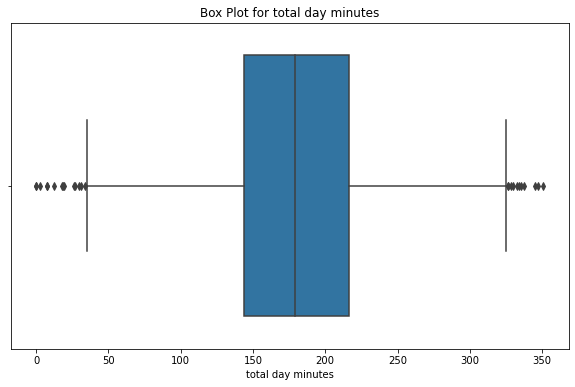

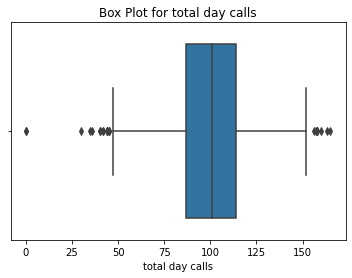

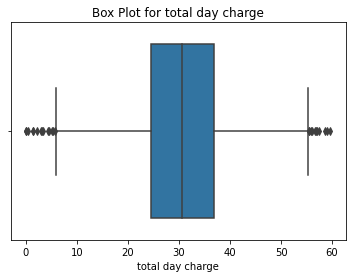

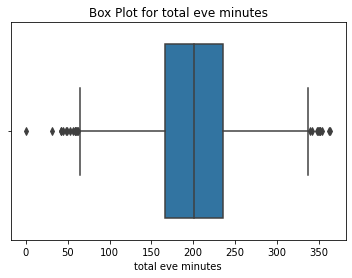

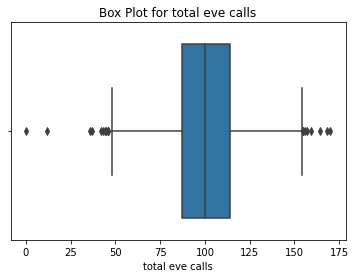

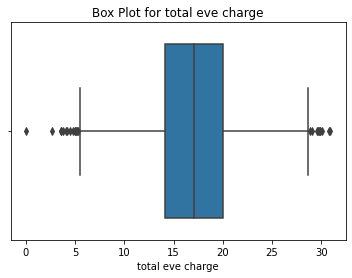

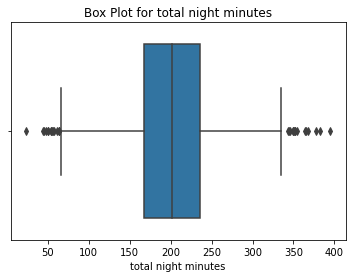

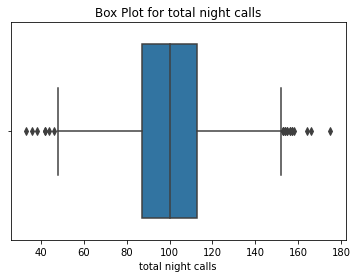

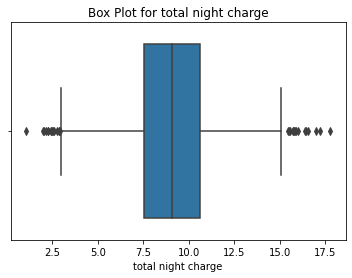

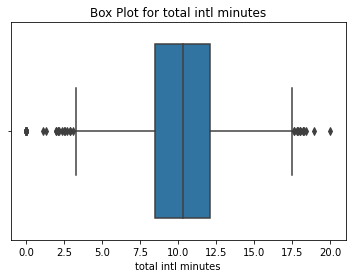

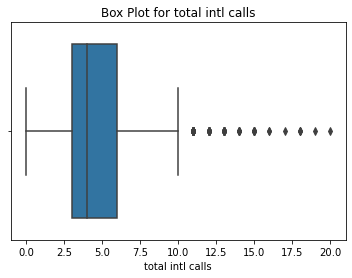

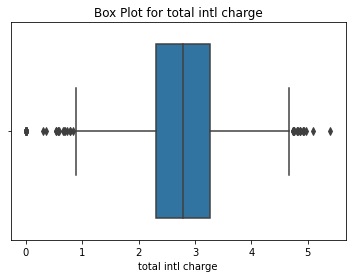

In [6]:
df.plot_box_plots(
    ["total day minutes",
     "total day calls",
     "total day charge",
     "total eve minutes",
     "total eve calls",
     "total eve charge",
     "total night minutes",
     "total night calls",
     "total night charge",
     "total intl minutes",
     "total intl calls",
     "total intl charge"
    ])

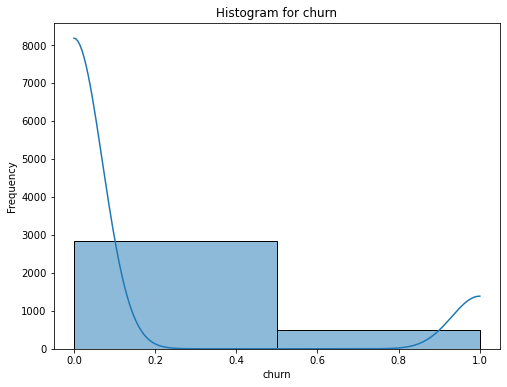

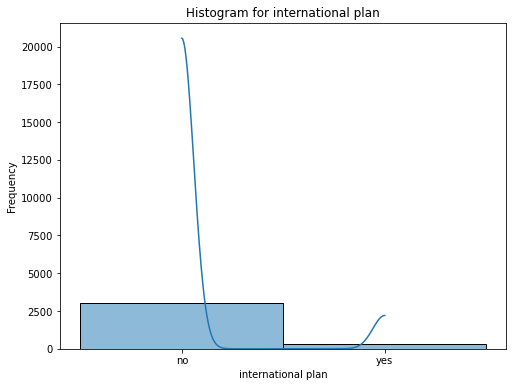

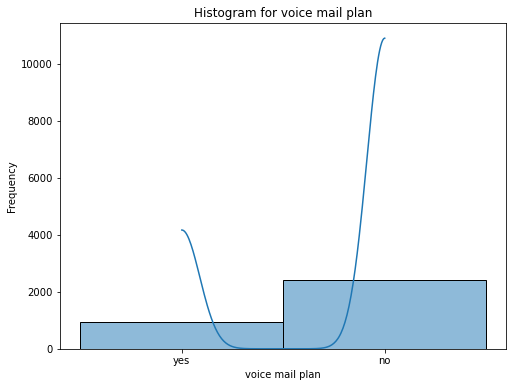

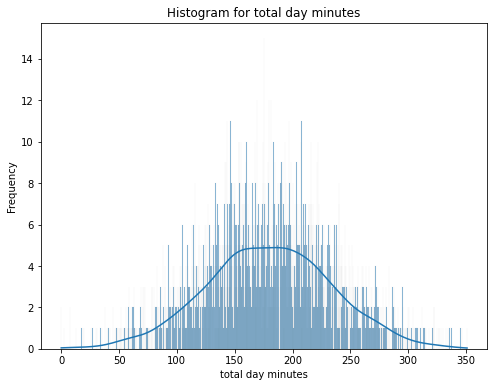

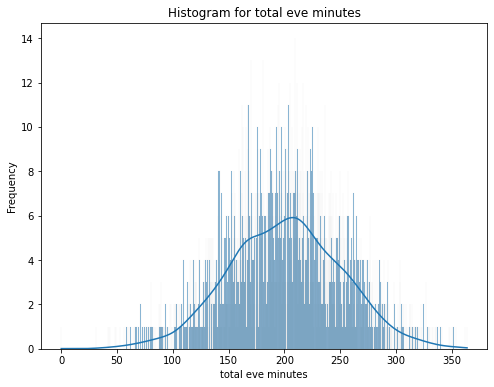

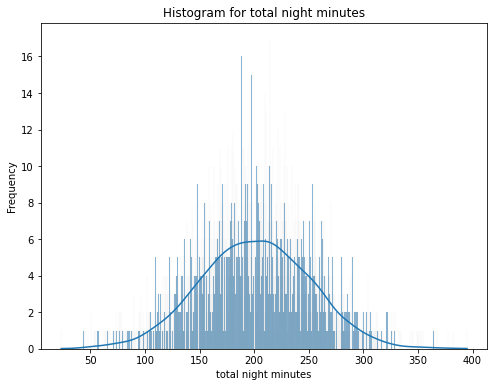

In [32]:
df.histogram("churn")
df.histogram("international plan")
df.histogram("voice mail plan")
df.histogram('total day minutes')
df.histogram('total eve minutes')
df.histogram('total night minutes')

In [61]:
class CleanDataEDA(data_EDA):
    def __init__(self, csv_path):
        super().__init__(csv_path)

    def clean_data(self):
        
#         remove column spaces
        self.data.columns = self.data.columns.str.replace(' ', '_')
    
        
#         remove outliers
        float_columns = self.data.select_dtypes(include='float')
        Q1 = self.data.quantile(0.25)
        Q3 = self.data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        self.data = self.data[(self.data >= lower_bound) & (self.data <= upper_bound)]
        
#         add total calls column
        self.data['total_calls'] = (
            self.data.loc[:, 'total_day_calls']
            + self.data.loc[:, 'total_eve_calls']
            + self.data.loc[:, 'total_night_calls']
            + self.data.loc[:, 'total_intl_calls']
    )
    
    
    def display_summary(self):
        # Override the display_summary method
        self.clean_data()
        print("Cleaned Dataset Summary:")
        print(self.data.info())
        print("\nCleaned Descriptive Statistics:")
        print(self.data.describe())
        print("\nCleaned Dataset Sample:")
        print(self.data.head())


clean_df = CleanDataEDA("bigml.csv")
clean_df.display_summary()


Cleaned Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   0 non-null      object 
 1   account_length          3315 non-null   float64
 2   area_code               3333 non-null   int64  
 3   phone_number            0 non-null      object 
 4   international_plan      0 non-null      object 
 5   voice_mail_plan         0 non-null      object 
 6   number_vmail_messages   3332 non-null   float64
 7   total_day_minutes       3308 non-null   float64
 8   total_day_calls         3310 non-null   float64
 9   total_day_charge        3308 non-null   float64
 10  total_eve_minutes       3309 non-null   float64
 11  total_eve_calls         3313 non-null   float64
 12  total_eve_charge        3309 non-null   float64
 13  total_night_minutes     3303 non-null   float64
 14  total_night_cal

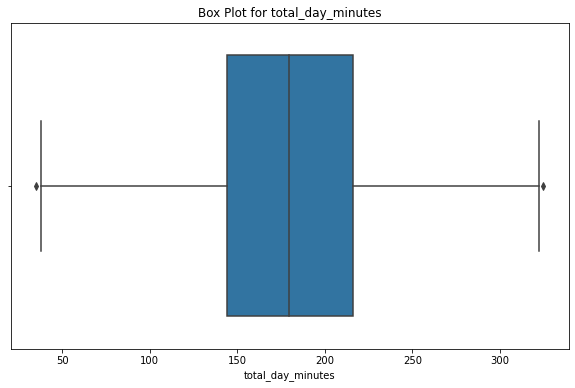

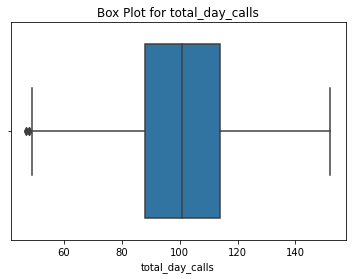

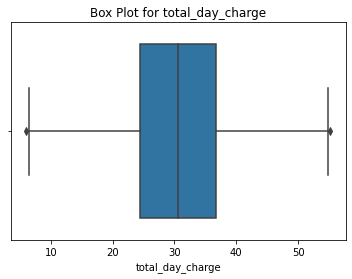

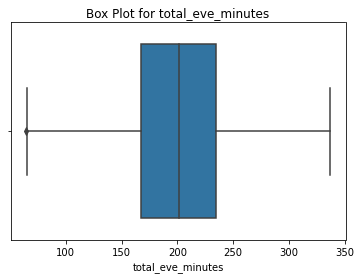

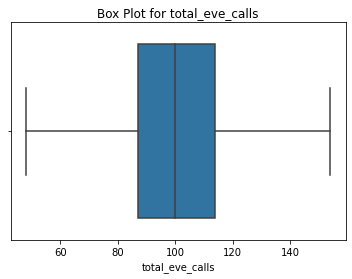

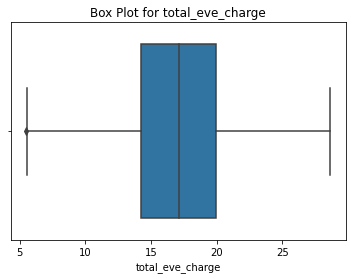

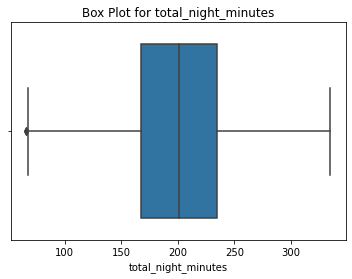

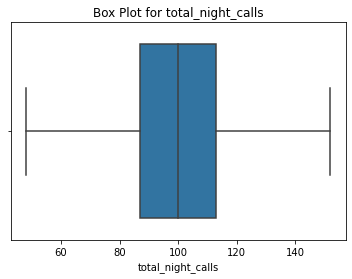

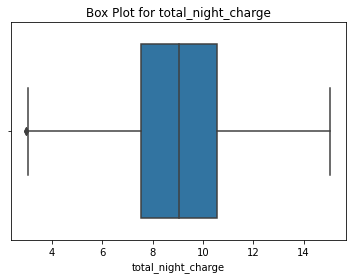

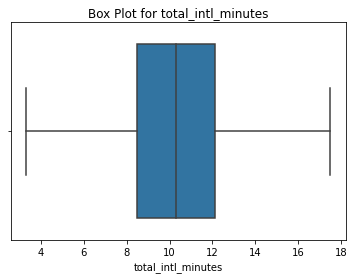

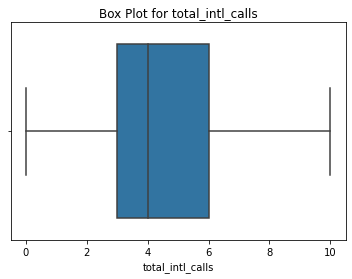

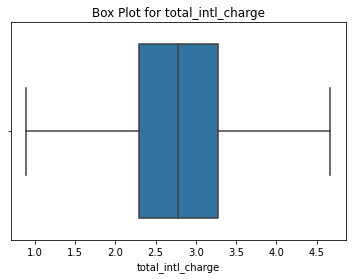

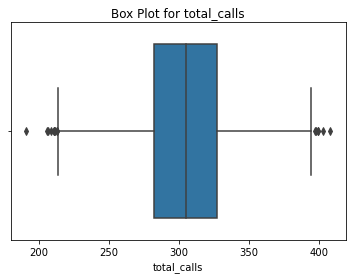

In [58]:
clean_df.plot_box_plots(
    ["total_day_minutes",
     "total_day_calls",
     "total_day_charge",
     "total_eve_minutes",
     "total_eve_calls",
     "total_eve_charge",
     "total_night_minutes",
     "total_night_calls",
     "total_night_charge",
     "total_intl_minutes",
     "total_intl_calls",
     "total_intl_charge",
     "total_calls"
    ])